In [1]:
from cmath import exp
from re import S
from unicodedata import name
import numpy as np
import time
import timeit  # dependency for testing! Don't use in Viperleed build
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit
import random
import os

In [2]:
from rfactor import r_factor_new as rf
from interpolation import interpolation as intpol

In [3]:
%run rf_test

 NaN before average
 Smoothing not yet implemented!
 New verison successfull
 Smoothing not yet implemented!
 New verison successfull


In [4]:
%matplotlib inline

In [5]:
    a = rf.r_pendry_beamset_y(
        e_step,
        prep_exp[-2][:, exp_corr],
        prep_theo[-2][:, theo_corr],
        prep_exp[0][exp_corr],
        prep_theo[0][theo_corr],
        prep_exp[1][exp_corr],
        prep_theo[1][theo_corr],
        0.0
    )


/Users/alexander/Documents/GitHub/viperleed/tensorleed/new_r-factor/wrapf2py/rf_test.py:87: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


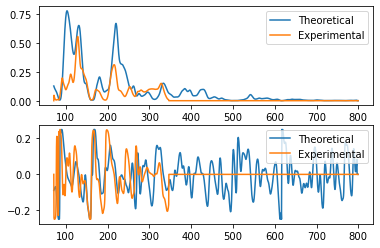

In [6]:
plot_csv(prep_exp, prep_theo, exp_corr, theo_corr, 1)

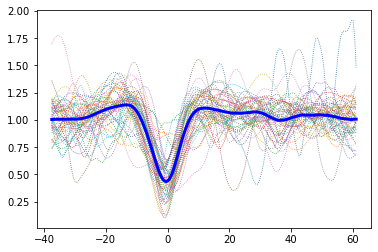

In [7]:
plt.figure()

e_step = out_grid[1] - out_grid[0]
shift = []
R_tot = []
R_beams = []
for i in range(-1000,1000):
    R_fac =  rf.r_pendry_beamset_y(
        e_step,
        prep_exp[-2][:, exp_corr],
        prep_theo[-2][:, theo_corr],
        prep_exp[0][exp_corr],
        prep_theo[0][theo_corr],
        prep_exp[1][exp_corr],
        prep_theo[1][theo_corr],
        i
    )
    if (R_fac[-1] ==0 ):
        V0r = i*e_step
        R_tot.append(R_fac[0])
        R_beams.append(R_fac[1])
        shift.append(V0r)
plt.plot(shift, R_beams, lw=.8, ls = ':')
plt.plot(shift, R_tot, lw= 3, color='blue')
plt.show()

/var/folders/fv/bxt6sbpd2sn0kbhr1rksclxc0000gp/T/ipykernel_39187/789184453.py:22: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


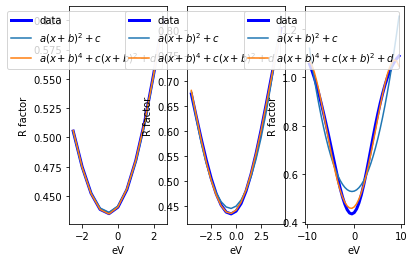

In [8]:
fig = plt.figure()

for i, n in enumerate((3, 5, 10)):
    ax = fig.add_subplot(1,3,i+1)
    V0r_range=np.where(np.abs(shift)<n)
    R_arr_fit = np.array(R_tot)[V0r_range]
    shift_arr_fit = np.array(shift)[V0r_range]



    para_opt, _ = curve_fit(parabola, shift_arr_fit, R_arr_fit)
    p4_opt, _ = curve_fit(poly4, shift_arr_fit, R_arr_fit)


    ax.plot(shift_arr_fit, R_arr_fit, lw= 3, color='blue', label = "data")
    ax.plot(shift_arr_fit, parabola(shift_arr_fit, *para_opt), label ="$a(x+b)^2 +c$")
    ax.plot(shift_arr_fit, poly4(shift_arr_fit, *p4_opt), label = "$a(x+b)^4 +c(x+b)^2 + d$")
    ax.set_xlabel("eV")
    ax.set_ylabel("R factor")
    ax.legend()

fig.show()


In [9]:
print(rf.r_pendry_beamset_v0r_opt_on_grid.__doc__)

best_id,best_id_real,best_r,best_v0r,r_pendry_weighted,r_pendry_beams,n_overlapping_points,ierr = r_pendry_beamset_v0r_opt_on_grid(range,start_guess,fast_search,e_step,y1,y2,id_start_y1,id_start_y2,n_y1,n_y2,[n_e,n_beams])

Wrapper for ``r_pendry_beamset_v0r_opt_on_grid``.

Parameters
----------
range : input rank-1 array('i') with bounds (2)
start_guess : input rank-1 array('i') with bounds (3)
fast_search : in/output rank-0 array(int,'i')
e_step : input float
y1 : input rank-2 array('d') with bounds (n_e,n_beams)
y2 : input rank-2 array('d') with bounds (n_e,n_beams)
id_start_y1 : input rank-1 array('i') with bounds (n_beams)
id_start_y2 : input rank-1 array('i') with bounds (n_beams)
n_y1 : input rank-1 array('i') with bounds (n_beams)
n_y2 : input rank-1 array('i') with bounds (n_beams)

Other Parameters
----------------
n_e : input int, optional
    Default: shape(y1,0)
n_beams : input int, optional
    Default: shape(y1,1)

Returns
-------
best_id : int
best_id_real : float
best_

In [ ]:
V0r_range = np.array([-20, 20], dtype="int32")
start_guess = np.array([-3, 0, 3])
fast_search = False

rf.r_pendry_beamset_v0r_opt_on_grid(
    V0r_range,
    start_guess,
    fast_search,
    e_step,
    prep_exp[-2][:, exp_corr],
    prep_theo[-2][:, theo_corr],
    prep_exp[0][exp_corr],
    prep_theo[0][theo_corr],
    prep_exp[1][exp_corr],
    prep_theo[1][theo_corr])

In [10]:
V0r_range

(array([56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72,
        73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89,
        90, 91, 92, 93, 94]),)